## 합성곱 신경망 소개

합성곱 신경망(Convolutional Neural Networks, CNN)은 이미지나 비디오 등의 공간적 구조를 가진 데이터를 처리하는 데 유용한 딥러닝 모델

- 입력 레이어: 원시 이미지 데이터를 받아들이는 첫 번째 레이어. 이미지는 보통 높이, 너비, 그리고 색상 채널(예: RGB)의 3차원 텐서로 표현.

- 합성곱 레이어(Convolutional Layer): 이 레이어는 이미지의 지역적 특성을 학습. 이 레이어에서는 "필터" 또는 "커널"이라는 작은 윈도우가 이미지를 스캔하며 이동. 각 필터는 고유한 특징(예: 가장자리, 텍스처 등)을 인식.

- 필터/커널: 합성곱 층에서 사용되는 작은 행렬로, 랜덤한 값으로 초기화된 후에 데이터를 통해 학습. 필터는 이미지의 여러 부분을 스캔하며 특정 특징을 인식. 각 필터는 이미지의 다른 특성을 감지하는 역할을 한다. 예를 들어, 어떤 필터는 가로선을, 다른 필터는 세로선을, 또 다른 필터는 모서리나 특정 패턴을 감지할 수 있습니다. 여러 개의 필터를 사용함으로써, 다양한 특성을 추출하고 이미지를 더 잘 이해할 수 있다.

- 스트라이드: 필터가 이미지 위를 이동하는 간격. 스트라이드 값에 따라 출력 피쳐 맵의 크기가 결정되며 큰 스트라이드는 작은 출력 차원을 생성하고, 작은 스트라이드는 큰 출력 차원을 생성.

- 패딩: 입력 이미지의 주위에 픽셀을 추가하는 방법으로, 합성곱이 적용된 후의 출력 크기를 조절할 수 있다. 패딩이 없으면 합성곱 연산을 거치면서 출력 이미지의 크기가 작아진다. 패딩을 사용하면 이를 방지하고 원본 이미지의 공간적 크기를 보존할 수 있다.

- 활성화 함수: 일반적으로 ReLU(Rectified Linear Unit) 같은 비선형 활성화 함수가 사용되어 복잡한 패턴을 학습할 수 있도록 한다.

- 풀링 레이어(Pooling Layer): 이 레이어는 출력을 다운샘플링하여 모델의 복잡도를 줄이고, 과적합을 방지하며, 일부 공간적 인식력을 보존. 가장 많이 사용되는 풀링 방법은 최대 풀링(Max Pooling)이다.

- 완전 연결 레이어(Fully Connected Layer): 이 레이어는 모든 입력 뉴런이 모든 출력 뉴런과 연결되어 있다. 이는 일반적으로 신경망의 마지막 단계에서 사용되며, 합성곱 및 풀링 레이어를 통해 학습된 고차원 특징을 이용하여 최종적으로 분류나 회귀 등의 작업을 수행.

- 이러한 각 요소들이 어떻게 함께 작동하는지 간단하게 설명하면, 합성곱 레이어의 필터는 입력 이미지를 스캔하면서 지역적인 특징을 감지하고, 이 정보를 활성화 맵(특징 맵)의 형태로 출력. 이때, 스트라이드와 패딩은 필터가 이미지를 어떻게 스캔할지를 결정하며, 활성화 함수는 비선형성을 추가하여 복잡한 패턴을 학습하게 해준다. 그 다음, 풀링 레이어는 이 특징 맵을 다운샘플링하여 모델의 복잡도를 줄이고, 공간적 인식력을 보존하며, 과적합을 방지한다. 마지막으로, 완전 연결 레이어는 이런 모든 특징들을 종합하여 최종적으로 이미지의 클래스를 예측하거나, 객체의 위치를 회귀하는 등의 작업을 수행한다.
이런 식으로, CNN은 각 레이어에서 이미지의 다양한 특징을 학습하고, 이 정보를 바탕으로 복잡한 패턴을 인식하고, 효과적인 예측을 수행하게 됩니다.

- 2D 합성곱 (Conv2D): 이는 가장 흔히 사용되는 합성곱 유형으로, 이미지 같은 2차원 데이터에 적용. Conv2D는 입력 데이터의 지역적 특징을 인식하고 이를 학습하는 데 사용.

- 1D 합성곱 (Conv1D): 이 유형의 합성곱은 시퀀스 데이터(예: 시계열 데이터, 텍스트 데이터)를 처리하는 데 주로 사용. 이는 입력 시퀀스의 연속적인 부분을 고려하므로, 특히 시간적인 순서 정보가 중요한 문제에 유용.

https://kyeonminsu.tistory.com/30

In [2]:
# 실행마다 동일한 결과를 어딕 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
#tf.config.experimental.enable_op_determinism() # TensorFlow에서의 연산을 결정론적으로 수행하도록 강제. 동일한 입력값에 대해 동일한 출력을 항상 보장하는

# 패션 MNIST 데이터 불러오기

In [3]:
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = tf.keras.datasets.fashion_mnist.load_data()

# train_input은 원래 (60000, 28, 28) 의 3차원 배열입니다. 여기에서 reshpq(-1, 28, 28, 1)을 사용하여 데이터를 (60000, 28, 28, 1)로 변환
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_input.shape # 데이터셋

(60000, 28, 28)

In [5]:
train_scaled.shape # 훈련셋 크기

(48000, 28, 28, 1)

### 합성곱 신경망(Convolutional Neural Networks, CNNs)에서 필터(또는 커널)를 여러 개 사용하는 이유

- 특성 추출: 각 필터는 이미지의 다른 특성을 감지하는 역할을 합니다. 예를 들어, 어떤 필터는 가로선을, 다른 필터는 세로선을, 또 다른 필터는 모서리나 특정 패턴을 감지할 수 있습니다. 여러 개의 필터를 사용함으로써, 다양한 특성을 추출하고 이미지를 더 잘 이해할 수 있습니다.

- 복잡한 패턴 학습: 초기 층의 필터가 간단한 특성을 추출하는 데 사용된다면, 네트워크의 깊은 층으로 갈수록 이러한 특성들이 결합되어 더 복잡한 패턴을 학습할 수 있습니다. 예를 들어, 얼굴 인식을 위한 CNN에서는 초기 층이 간단한 가장자리를 감지하는 반면, 더 깊은 층에서는 눈, 코, 입과 같은 특징을 학습하고, 최종적으로는 얼굴 전체의 복잡한 패턴을 인식할 수 있습니다.

- 증가된 모델의 용량: 여러 개의 필터를 사용함으로써, 모델은 더 많은 정보를 처리하고 저장할 수 있게 됩니다. 이는 모델이 더 복잡한 함수를 학습하고, 더 다양한 데이터에 대해 일반화할 수 있게 만듭니다.

- 다양한 해상도의 정보 포착: 다양한 크기의 필터를 사용하면, 다른 해상도에서의 특성을 포착할 수 있습니다. 작은 필터는 미세한 패턴을, 큰 필터는 이미지의 광범위한 구조를 감지할 수 있습니다. 이는 이미지의 다양한 측면을 이해하는 데 도움이 됩니다.

In [6]:
model = tf.keras.Sequential()

In [7]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(28, 28, 1)), # input 객체를 사용하여 입력 형태를 명시적으로 정의
    Conv2D(32, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(2),
    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(2),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

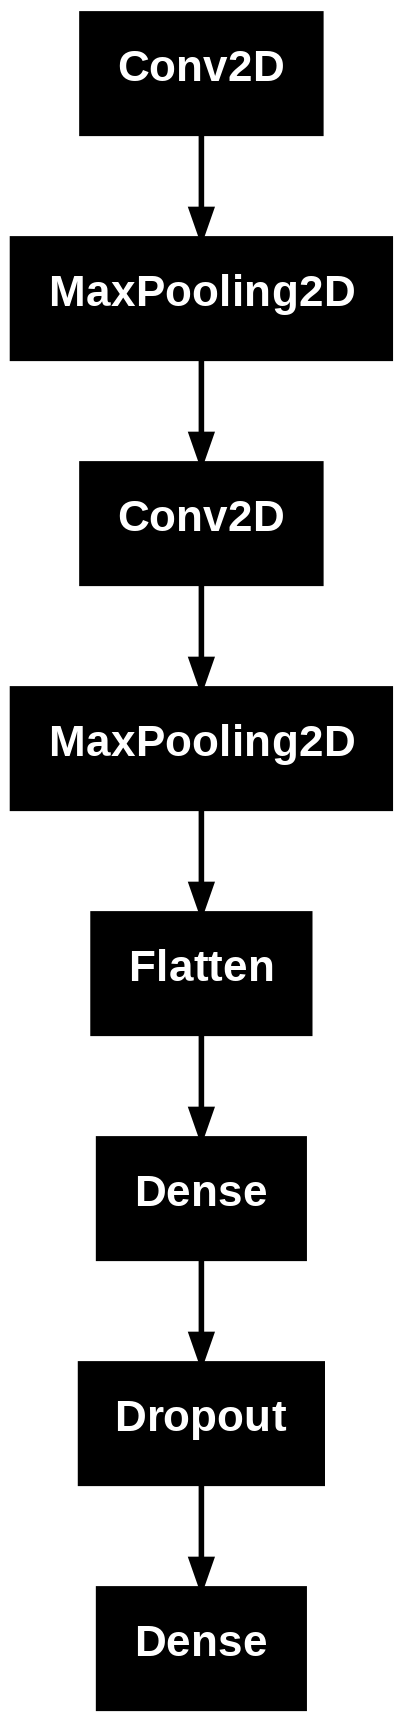

In [9]:
# TensorFlow의 Keras API를 사용하여 정의된 신경망 모델의 구조를 시각화
tf.keras.utils.plot_model(model)

In [13]:
!ls

model.png  sample_data


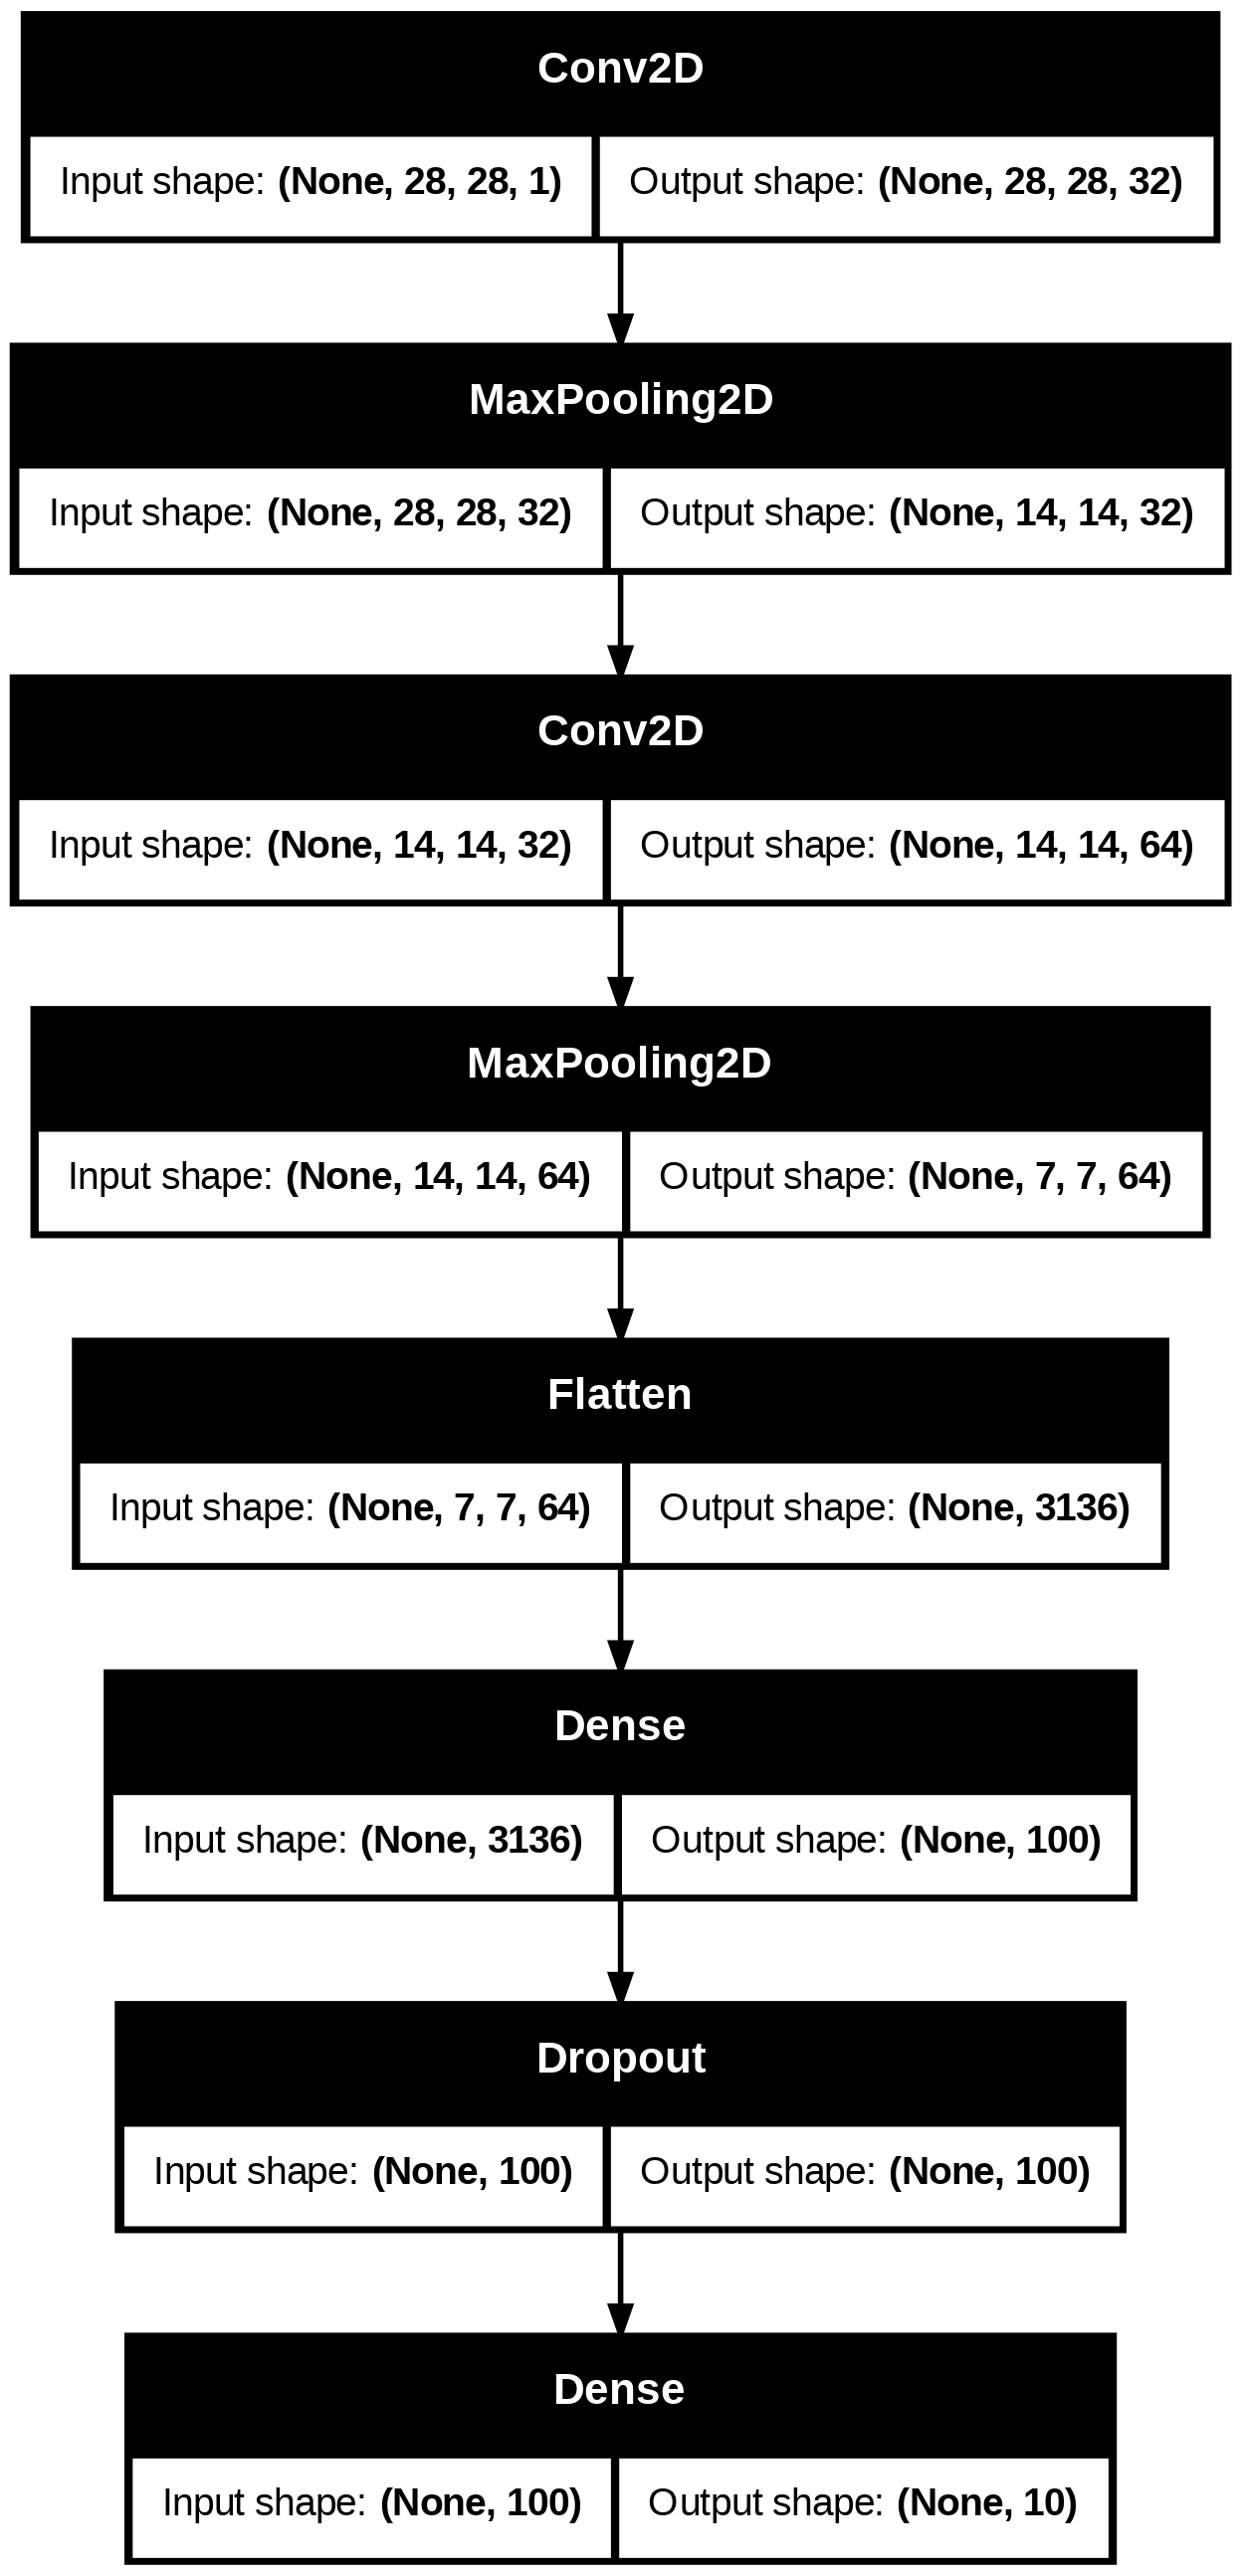

In [12]:
# 모델의 구조를 'model.png' 파일로 저장하며, 각 레이어에서의 입력과 출력의 형태를 그림에 포착
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [14]:
# 모델 컴파일
#sparse_categorical_crossentroopy : 클래스 레이블이 정수형으로 되어 있을때 (예 : 0, 1, 2 등) 주로 사용
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 체크포인트 설정 (best-cnn-model.keras 형식으로 저장)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/kdt_240424/m8_vision 응용/best-cnn-model.keras', save_best_only=True)

# 조기 종료 설정
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

# 모델 학습
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data = (val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 52ms/step - accuracy: 0.7402 - loss: 0.7244 - val_accuracy: 0.8758 - val_loss: 0.3355
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.8686 - loss: 0.3654 - val_accuracy: 0.8973 - val_loss: 0.2804
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.8869 - loss: 0.3074 - val_accuracy: 0.9013 - val_loss: 0.2652
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.8976 - loss: 0.2735 - val_accuracy: 0.9121 - val_loss: 0.2423
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.9076 - loss: 0.2520 - val_accuracy: 0.9141 - val_loss: 0.2350
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.9147 - loss: 0.2282 - val_accuracy: 0.9177 - val_loss: 0.2350
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 94s 53ms/step - accuracy: 0.9208 - loss: 0.2094 - val_accuracy: 0.9147 - val_loss: 0.2510


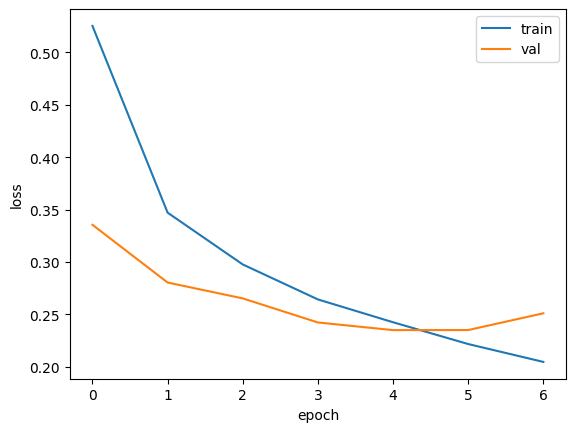

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

In [16]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9171 - loss: 0.2259


[0.23498238623142242, 0.9140833616256714]

In [17]:
val_scaled.shape

(12000, 28, 28, 1)

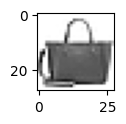

In [19]:
plt.figure(figsize=(1,1))
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [22]:
# 배열에서 첫 번째 요소(인덱스 0)를 슬라이싱하여 선택합니다. 배열 슬라이싱은 인덱싱과 다르게 선택된 원소가 하나이더라도 전체 차원이 유지되어(1,28,28,1)의 크기로 만듬.
# 여기서 중요한 점은 슬라이싱을 사용함으로써 반환된 데이터의 형태가 원본 배열의 부분집합을 유지한다는 것 입니다.
preds = model.predict(val_scaled[0:10])
print(preds[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[1.1236815e-17 1.5176847e-24 3.1555899e-19 4.9576508e-17 1.5392858e-18
 8.0073757e-17 6.5355015e-18 1.2350364e-17 9.9999994e-01 2.6106838e-18]


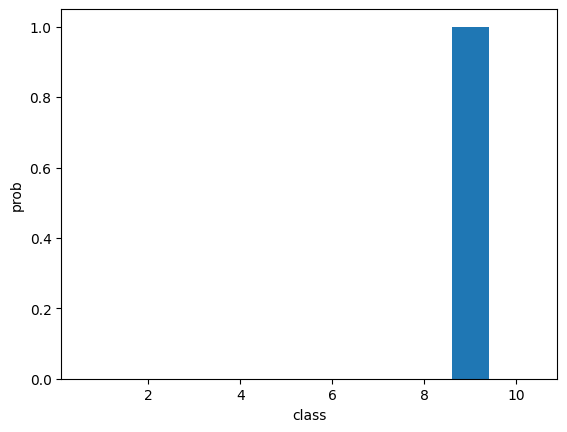

In [24]:
# 첫 번째 이미지(0번째 인덱스)에 대한 카테고리를 예측하고, 해당 예측에 대한 확률 분포를 반환
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [25]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코드', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [27]:
import numpy as np
print(classes[np.argmax(preds[0])])

가방


In [29]:
test_scaled = test_input.reshape(-1,28,28,1)/ 255.0

In [30]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9075 - loss: 0.2648


[0.2544611990451813, 0.9067000150680542]

## 모델 개선
- 과대적합 방지 - 학습 파라미터 수 축소
- 모델 성능 높이기 - 레이어 추가
- 모델 성능 높이기 - 이미지 증식

- SpatialDropout2D: 2D 공간에서 특정 뉴런을 무작위로 드롭아웃합니다.
- ReduceLROnPlateau: 학습 성능이 개선되지 않을 경우 학습률을 동적으로 감소시킵니다.
- ImageDataGenerator: 이미지 데이터를 실시간으로 증강(augmentation)시키는 클래스입니다. 데이터 양을 늘리고 과적합을 방지하기 위해 이미지 회전, 확대, 축소 등의 변환을 수행할 수 있습니다.

In [32]:
!pip install datatime

ERROR: Could not find a version that satisfies the requirement datatime (from versions: none)
ERROR: No matching distribution found for datatime


In [34]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-white")

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten, Reshape, Input
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# 데이터 로드
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 이미지 데이터에 채널 차원이 명시적으로 없는 경우 (예: (28,28) 크기의 이미지) 채널 차원을 추가
x_train = x_train[..., np.new]

In [ ]:
class_names = ['T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [ ]:
# 모델 구성 및 컴파일
def build_model():
    # model=Sequential()
    input = Input(shape=(28, 28, 1))
    output = Conv2D(filters=32, kernel_size=(3, 3))(input)
    output = Conv2D(filters=64, kernel_size=(3, 3))(output)
    output = Conv2D(filters=64, kernel_size=(3, 3))(output)
    output = Flatten()(output)
    output = Dense(128, activation='relu')(output)
    output = Dense(64, activation='relu')(output)
    output = Dense(10, activation='softmax')(output)

    model = Model(inputs=[input], outputs=output)

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
    return model

model_1 = build_model()
model_1.summary()